In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster.bicluster import SpectralCoclustering 

/home/namur/coding/environments/python_3.6.8/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.bicluster module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# sort a DataFrame by index
x = pd.Series([6,3,8,6], index=["q", "w", "e", "r"])
x.reindex(sorted(x.index))

e    8
q    6
r    6
w    3
dtype: int64

In [3]:
# convert a dict to a DataFrame
age = {"Tim": 29, "Jim": 31, "Pam": 27, "Sam": 35}
x = pd.Series(age)

In [4]:
# add two series
x = pd.Series([6,3,8,6], index=["q", "w", "e", "r"])
y = pd.Series([7,3,5,2], index=["e", "r", "q", "t"])

# get added by indices
x + y

e    15.0
q    11.0
r     9.0
t     NaN
w     NaN
dtype: float64

In [5]:
# read data
whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")

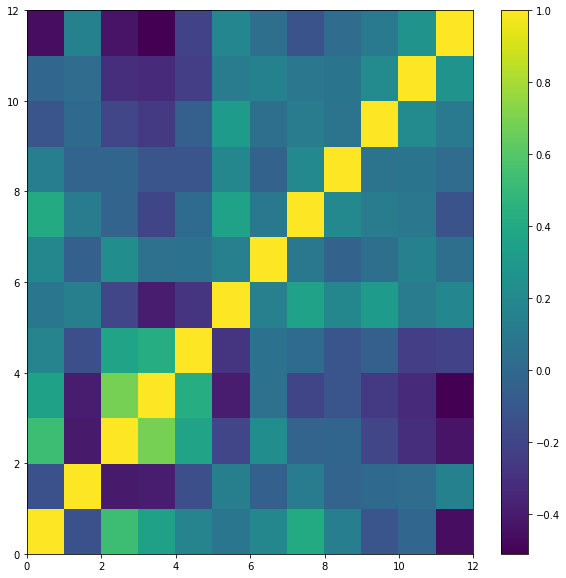

In [6]:
# correlate flavors (pearson correlation)
flavors = whisky.iloc[:, 2:14]
corr_falvors = pd.DataFrame.corr(flavors)

# plot
plt.figure(figsize=(10,10))
plt.pcolor(corr_falvors)
plt.colorbar()
plt.show()

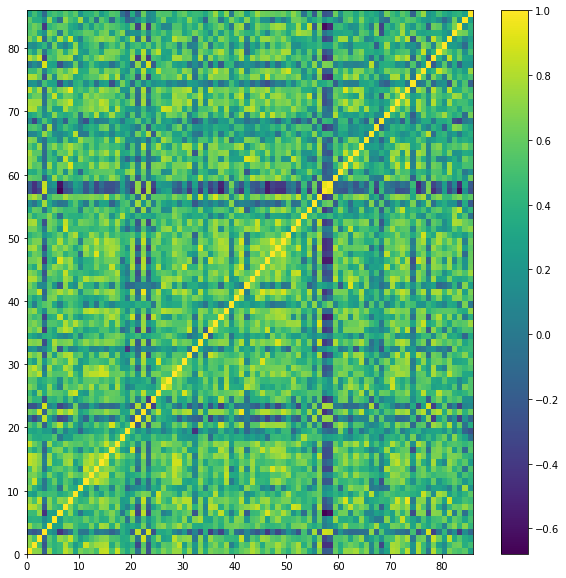

In [7]:
# correlate whisky to distillery (pearson correlation)
flavors = whisky.iloc[:, 2:14]
corr_whisky = pd.DataFrame.corr(flavors.transpose())

# plot
plt.figure(figsize=(10,10))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
plt.show()

In [23]:
### cluster whiskies
# create model
model = SpectralCoclustering(n_clusters=6, random_state=0)

# fit to data;
model.fit(corr_whisky)

# how many whiskeys belong to cluster 0, 1, ..., 5
np.sum(model.rows_, axis=1)

array([ 5, 20, 19,  6, 19, 17])

In [29]:
### store clutsters to whisky df
# extract group labels from the model and append them to the whisky table.
whisky["Group"] = pd.Series(model.row_labels_, index=whisky.index)

# reorder rows in increasing order by group labels.
whisky = whisky.loc[np.argsort(model.row_labels_)]

# reset index
whisky = whisky.reset_index(drop=True)

In [31]:
# calculate correlations for reorder table
correlations = pd.DataFrame.corr(whisky.iloc[:, 2:14].transpose())
correlations = np.array(correlations)

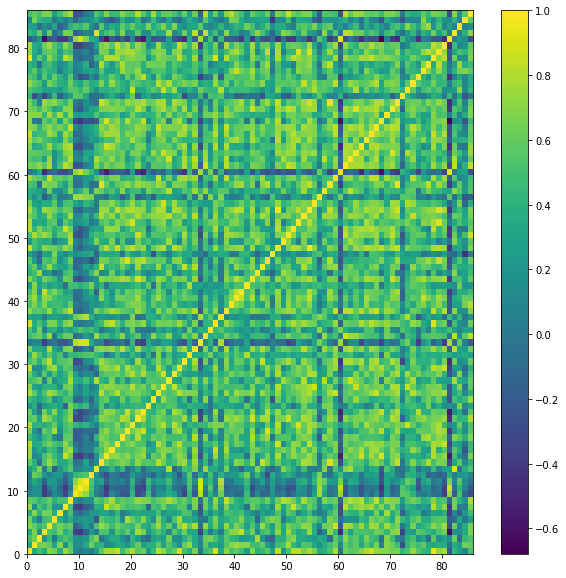

In [32]:
# plot
plt.figure(figsize=(10,10))
plt.pcolor(correlations)
plt.axis("tight")
plt.colorbar()
plt.show()